# **DATA COLLECTION**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [5]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'Fire': 0, 'NoFire': 1}

# **MODEL BUILDING AND FITTING**

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

**COMPILE THE MODEL ✈**

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**FIT THE MODEL ⚡**

In [9]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 0.6967 - accuracy: 0.5500 - val_loss: 0.5912 - val_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6388 - accuracy: 0.5500 - val_loss: 0.9704 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.9761 - accuracy: 0.5000 - val_loss: 0.6340 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6478 - accuracy: 0.5000 - val_loss: 0.6171 - val_accuracy: 0.9500
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.6174 - accuracy: 0.8500 - val_loss: 0.6139 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.6048 - accuracy: 0.8000 - val_loss: 0.5628 - val_accuracy: 0.8500
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5632 - accuracy: 0.8500 - val_loss: 0.4429 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======================

**LOSS VS ITERATION GRAPH ⤴**

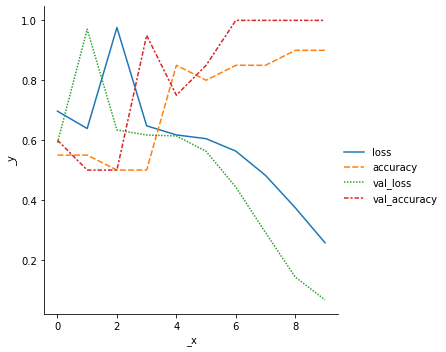

In [23]:
import seaborn as plt

plt.relplot(data=r.history, kind="line")

**ACCURACY/ITERATION ⤴**

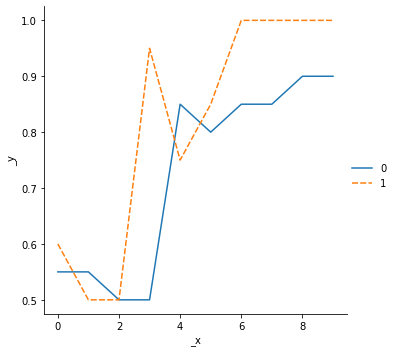

In [30]:
import seaborn as plt

plt.relplot(data=[r.history["accuracy"],r.history["val_accuracy"]], kind="line")